## Load Video and convert frames to image

In [17]:
from facenet_pytorch import MTCNN, extract_face
from PIL import Image, ImageDraw
import cv2
import pandas as pd
import numpy as np
from cap_from_youtube import cap_from_youtube

[youtube] Extracting URL: https://www.youtube.com/watch?v=AgHaGrZkkv4
[youtube] AgHaGrZkkv4: Downloading webpage
[youtube] AgHaGrZkkv4: Downloading android player API JSON
3904 images put into list_of_images_pil


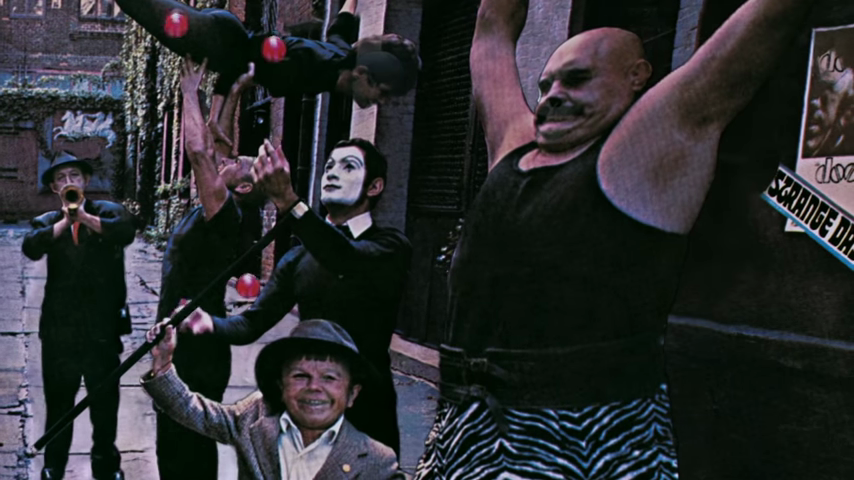

In [18]:
youtube_url = 'https://www.youtube.com/watch?v=AgHaGrZkkv4'
cap = cap_from_youtube(youtube_url, '480p')
success = True
count = 0
list_of_images_pil = []
while success:
    success, frame = cap.read()
    if success == False:
        break
    cv2_image = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
    pil_image = Image.fromarray(cv2_image)
    list_of_images_pil.append(pil_image)
print(f'{len(list_of_images_pil)} images put into list_of_images_pil')


list_of_images_pil[512]

## Face Detection Model

In [19]:
#Load MTCNN Face detection Model
face_detector = MTCNN(keep_all=True)

In [20]:
face_tensor, prob = face_detector(img = list_of_images_pil[512], save_path = 'temp_face_img/', return_prob = True)

ValueError: unknown file extension: 

## Emotion Detection Model

In [21]:
from numpy import asarray
from tensorflow.keras.models import load_model
import tensorflow as tf

In [22]:
# Load/Initialise the Emotions Model
emotion_model = load_model('../models/emotion_model.hdf5', compile=False)
emotion_model.make_predict_function()



In [23]:
# Define Emotions to Catagories

def get_labels():
    return {
    0: "angry",
    1: "disgust",
    2: "fear",
    3: "happy",
    4: "sad",
    5: "surprise",
    6: "neutral",
        }

In [24]:
# Normalise the face array 

def Normalise_Image(x, v2=False):
    x = x.astype("float32")
    x = x / 255.0
    if v2:
        x = x - 0.5
        x = x * 2.0
    return x

In [26]:
# Feed images into the model for predictions

emotion_predictions = []

emotion_model(list_of_images_pil[512])

TypeError: Inputs to a layer should be tensors. Got: <PIL.Image.Image image mode=RGB size=854x480 at 0x177ED1CA0>

## Data Processing & Plotting